In this chapter, we will take a dive into another subcategory of supervised learning: regression analysis.

In [33]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')

__CRIM__ - this is the per capita crime rate by town<br>
__ZN__ - this is the proportion of residential land zoned for lots larger than 25,000 sq.ft.<br>
__INDUS__ - this is the proportion of non-retail business acres per town<br>
__CHAS__  - this is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)<br>
__NOX__ - this is the nitric oxides concentration (parts per 10 million)<br>
__RM__ - this is the average number of rooms per dwelling<br>
__AGE__ - this is the proportion of owner-occupied units built prior to 1940<br>
__DIS__ - this is the weighted distances to five Boston employment centers<br>
__RAD__ - this is the index of accessibility to radial highways<br>
__TAX__ - this is the full-value property-tax rate per \$10,000<br>
__PTRATIO__ - this is the pupil-teacher ratio by town<br>
__B__ - this is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town<br>
__LSTAT__ - this is the percentage lower status of the population<br>
__MEDV__ - this is the median value of owner-occupied homes in $1000s<br>

In [34]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [35]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


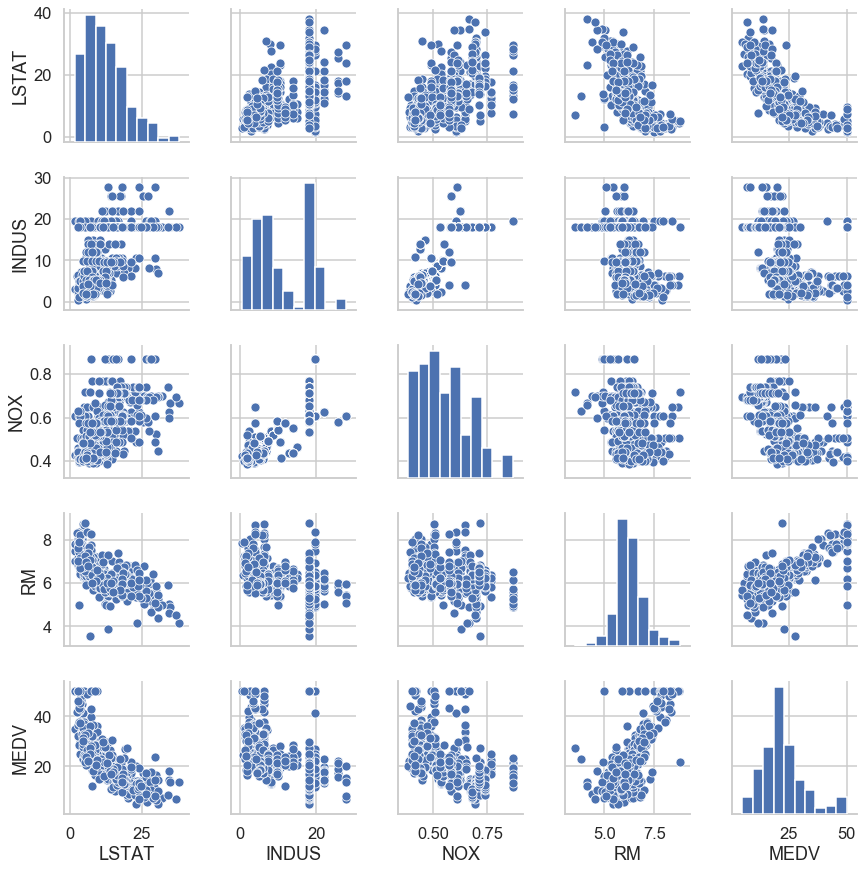

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns_pp = sns.pairplot(df[cols], height=2.5)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

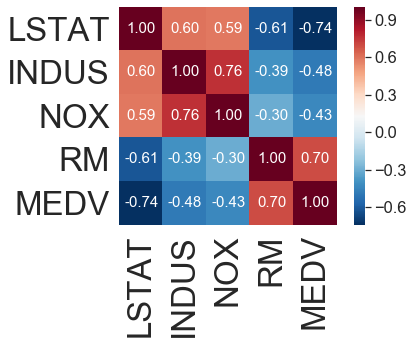

In [72]:
import numpy as np
fig, ax = plt.subplots()
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,)

sns.set(font_scale=4)
# Next line is here in order to fix the bug
ax.set_ylim(len(cols), 0) # https://github.com/matplotlib/matplotlib/issues/14751
plt.show()

# Ordinary Least Squares (OLS)

In implementation of the ADAptive LInear NEuron (Adaline) cost function is the Sum of Squared Errors (SSE) this is identical to the OLS cost function.

In [7]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] = self.w_[1:] + self.eta * X.T.dot(errors)
            self.w_[0] = self.w_[0] + self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [8]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(X, y, lr)       
        
    return self

In [9]:
X = df[['RM']].values
y = df['MEDV'].values.reshape(-1, 1)
print(f'Shape X:{X.shape}, shape y:{y.shape}.')

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
print(f'X_std = {X_std.shape}, y_std = {y_std.shape}.')
lr = LinearRegression()
lr.fit(X_std, y_std, n_iter=20, lr=0.001)


Shape X:(506, 1), shape y:(506, 1).
X_std = (506, 1), y_std = (506, 1).


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,506)

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='white',edgecolor='green')
    plt.plot(X, model.predict(X), color='red')
    return None


In [ ]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

In [ ]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [ ]:
Xb = np.hstack((np.ones((X.shape[0], 1)), X))

In [ ]:
w = np.zeros(X.shape[1])
w.shape

In [ ]:
z = np.linalg.inv(np.dot(Xb.T, Xb))

In [ ]:
w = np.dot(z, np.dot(Xb.T, y))

In [ ]:
print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=20,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X, y)

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=1)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers', edgecolor='k')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='red', marker='s', label='Outliers', edgecolor='k')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
plt.scatter(y_train_pred, y_train_pred-y_train, 
           c='blue', marker='o', edgecolor='k', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='red', marker='s', edgecolor='k', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Rediduals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=3, color='green')
plt.xlim([-10, 50])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

In [ ]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
      (r2_score(y_train, y_train_pred),
      r2_score(y_test, y_test_pred)))